# Loading the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
DATA_PATH = "gdrive/MyDrive/CiberCATSS/Spark/Spark Programming/data/titanic"

In [ ]:
train_data = f"{DATA_PATH}/train.csv"
test_data = f"{DATA_PATH}/test.csv"

# Loading the dataset from cloud storage

In [ ]:
import camber
spark = camber.spark.connect(worker_size="XSMALL")

DATA_PATH = "s3a://camber-spark-bkt/ciber-catts/shared-data/titanic"

train_data = f"{DATA_PATH}/train.csv"
test_data = f"{DATA_PATH}/test.csv"

# Necessary Imports

In [ ]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

# Inspect the dataset



In [ ]:
df = pd.read_csv(train_data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Task 1: Identify Missing Values

In [ ]:
# Check for missing values in the entire dataframe
missing_values = df.isnull().sum()

# Create a new dataframe to store the missing value information
missing_df = pd.DataFrame(missing_values, columns=['Missing Values'])


# Sort the dataframe based on the number of missing values in descending order
missing_df = missing_df.sort_values(by='Missing Values', ascending=False)

# Print the missing value information
print("Missing Values in the Titanic Dataset:\n")
missing_df

Missing Values in the Titanic Dataset:



,Missing Values
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


## Task 2: Filling missing values for 'Cabin' with 'Unknown'

In [ ]:
# Fill missing values in 'Cabin' column with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

## Task 3: Filling missing values for 'Age' depending on data distribution like skewness (hint: use median)

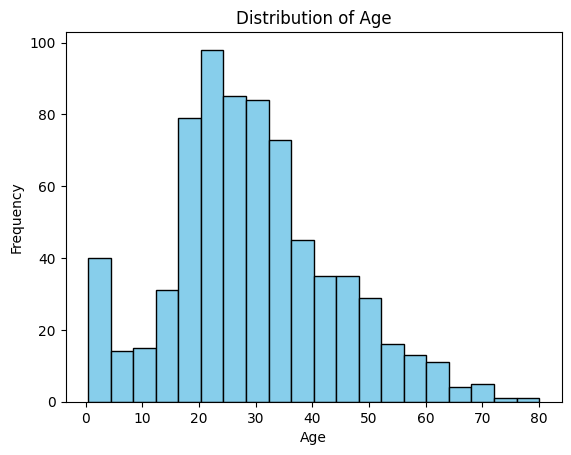

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the Titanic dataset into a dataframe called 'df'

# Plot the data distribution of 'Age' column
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show the plot
plt.show()


In [ ]:
# Calculate the median age
median_age = df['Age'].median()

# Fill missing values in 'Age' column with the median age
df['Age'] = df['Age'].fillna(median_age)

# Verify the changes
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

## Task 4: Identify rows with missing values for 'Embarked' and drop them

In [ ]:
# Identify rows with missing values for 'Embarked'
missing_embarked = df['Embarked'].isnull()

In [ ]:
missing_embarked[df['Embarked'].isnull()]

61     True
829    True
Name: Embarked, dtype: bool

In [ ]:
df.loc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                       NaN
Name: 61, dtype: object

In [ ]:
# Drop rows with missing values for 'Embarked'
df.dropna(subset=['Embarked'], inplace=True)

In [ ]:
# Verify the changes
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Task 5: Verify anymore missing values?

In [ ]:
# Verify the changes
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Exploratory Data Analysis

## Task 6: How many survived? Use pie chart for visualization

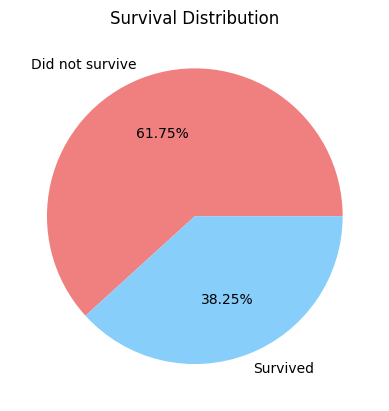

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the Titanic dataset into a dataframe called 'df'

# Count the number of survivors
survived_counts = df['Survived'].value_counts()

# Create a pie chart
plt.pie(survived_counts, labels=['Did not survive', 'Survived'], autopct='%1.2f%%' ,colors=['lightcoral', 'lightskyblue'])

# Add title
plt.title('Survival Distribution')

# Show the plot
plt.show()


## Task 7: How the survival rate was correlated with some variables/features:

### Sex:

In [ ]:
# Calculate the survival rate for each category of 'Sex'
df['Sex'].value_counts()


male      577
female    312
Name: Sex, dtype: int64

In [ ]:

# Calculate the survival counts for each category of 'Sex'
survived_counts_male = df[df['Sex'] == 'male']['Survived'].value_counts()
survived_counts_male



0    468
1    109
Name: Survived, dtype: int64

In [ ]:
# Calculate the survival counts for each category of 'Sex'
survived_counts_female = df[df['Sex'] == 'female']['Survived'].value_counts()
survived_counts_female

1    231
0     81
Name: Survived, dtype: int64

In [ ]:
# Check the number of males who survived and did not survive
males_survived = survived_counts_male[1]
males_not_survived = survived_counts_male[0]

print("Number of males who survived:", males_survived)
print("Number of males who did not survive:", males_not_survived)

Number of males who survived: 109
Number of males who did not survive: 468


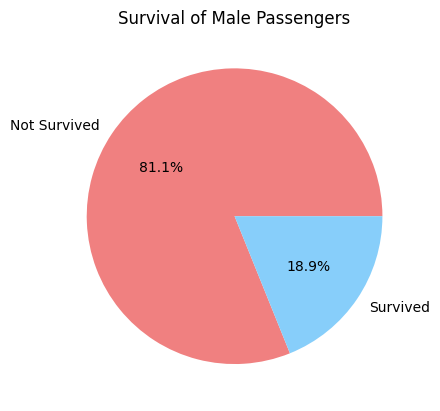

In [ ]:
# Create a pie chart
plt.pie(survived_counts_male, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])

# Add title
plt.title('Survival of Male Passengers')

# Show the plot
plt.show()

In [ ]:
# Calculate the survival counts for each category of 'Sex'
survived_counts_female = df[df['Sex'] == 'female']['Survived'].value_counts()
survived_counts_female

1    231
0     81
Name: Survived, dtype: int64

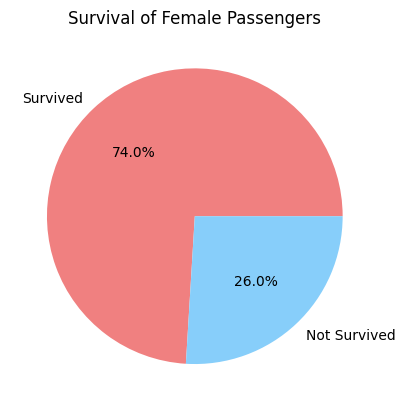

In [ ]:

# Create a pie chart
plt.pie(survived_counts_female, labels=['Survived', 'Not Survived'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])

# Add title
plt.title('Survival of Female Passengers')

# Show the plot
plt.show()

### Pclass:

In [ ]:
# Assuming you have already loaded the Titanic dataset into a dataframe called 'df'

# Calculate the survival counts for first-class passengers
first_class_survived_counts = df[df['Pclass'] == 1]['Survived'].value_counts()

first_class_survived_counts

1    134
0     80
Name: Survived, dtype: int64

In [ ]:

# Check the number of first-class passengers who survived and did not survive
first_class_survived = first_class_survived_counts[1]
first_class_not_survived = first_class_survived_counts[0]

print("Number of first-class passengers who survived:", first_class_survived)
print("Number of first-class passengers who did not survive:", first_class_not_survived)

Number of first-class passengers who survived: 134
Number of first-class passengers who did not survive: 80


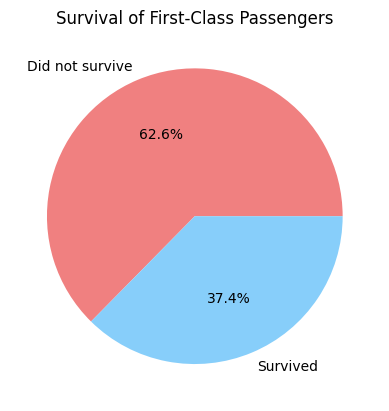

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a pie chart
plt.pie(first_class_survived_counts, labels=['Did not survive', 'Survived'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])

# Add title
plt.title('Survival of First-Class Passengers')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the survival counts for second-class passengers
second_class_survived_counts = df[df['Pclass'] == 2]['Survived'].value_counts()

second_class_survived_counts


0    97
1    87
Name: Survived, dtype: int64

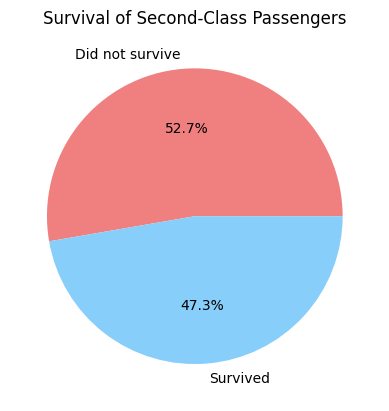

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a pie chart
plt.pie(second_class_survived_counts, labels=['Did not survive', 'Survived'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])

# Add title
plt.title('Survival of Second-Class Passengers')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the survival counts for third-class passengers
third_class_survived_counts = df[df['Pclass'] == 3]['Survived'].value_counts()

third_class_survived_counts


0    372
1    119
Name: Survived, dtype: int64

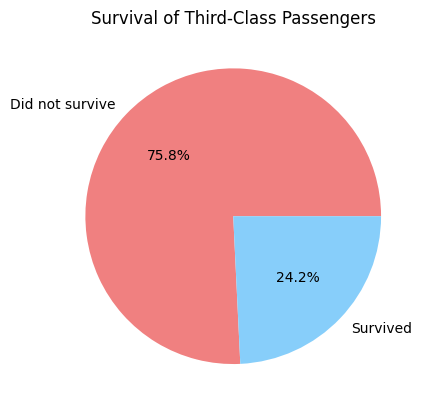

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a pie chart
plt.pie(third_class_survived_counts, labels=['Did not survive', 'Survived'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])

# Add title
plt.title('Survival of Third-Class Passengers')

# Show the plot
plt.show()


### Age:

In [ ]:
import pandas as pd


# Create separate dataframes for each age group based on filtering
df_0_17 = df[df['Age'] <= 17]
df_18_29 = df[(df['Age'] > 17) & (df['Age'] <= 29)]
df_30_49 = df[(df['Age'] > 29) & (df['Age'] <= 49)]
df_50_plus = df[df['Age'] > 49]

In [ ]:
df_0_17['Survived'].value_counts()

1    61
0    52
Name: Survived, dtype: int64

In [ ]:
len(df_0_17)

113